<center><h1>Glass identification project</h1></center>
<hr/>
<hr/>

## *Imports*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

<hr/>

## Functions, variables and constants

In [2]:
colors = ['lightgreen', 'blue', 'red', 'yellow', 'purple', 'orange']

dataset_location = '../datasets/02_glass_identification/glass.data'

# def scatterplot(dat,x,y, color='blue'):
#     """
#     x: name of the first column
#     y: name of the second column
#     color: color of the dots (optional)
#     """
#     plt.scatter(dat[x], dat[y], color=color, label='Data Points')
#     plt.xlabel(x)
#     plt.ylabel(y)
#     plt.title(f'Scatter Plot for {x} and {y}')
#     plt.show()    

# def histogram(dat,x, color='blue', bins=None):
#     """
#     x: name of the  column
#     color: color of the bins (optional)
#     """
#     plt.hist(dat[x], color=color, bins=bins)
#     plt.xlabel(x)
#     plt.ylabel('Frequency')
#     plt.title(f'Histogram for {x}')
#     plt.show() 

# def boxplot(data, classNum, column):
#     fig = plt.figure(figsize=(7, 3.5))
#     data[data['type']==classNum].drop([column], axis=1).boxplot()
#     plt.title(f'Бокс-плот за примероците од класа {column}')
#     plt.show()

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Model Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

<hr/>

## Importing the dataset

In [3]:
names = ['id', 'ri', 'na', 'mg', 'al', 'si', 'k', 'ca', 'ba', 'fe', 'type']
types = {
    1: 'building_windows_float_processed',
    2: 'building_windows_non_float_processed',
    3: 'vehicle_windows_float_processed',
    4: 'vehicle_windows_non_float_processed',
    5: 'containers',
    6: 'tableware',
    7: 'headlamps'
}
dataset = pd.read_csv(dataset_location, names=names)
dataset

,id,ri,na,mg,al,si,k,ca,ba,fe,type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


<hr/>

## Deleting redundant variable id because the id isnt related to anything

In [4]:
dataset.drop(columns='id', inplace=True)

<hr/>

## Exploring the dataset and visualizing the data

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ri      214 non-null    float64
 1   na      214 non-null    float64
 2   mg      214 non-null    float64
 3   al      214 non-null    float64
 4   si      214 non-null    float64
 5   k       214 non-null    float64
 6   ca      214 non-null    float64
 7   ba      214 non-null    float64
 8   fe      214 non-null    float64
 9   type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
dataset.corr()

,ri,na,mg,al,si,k,ca,ba,fe,type
ri,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
k,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [7]:
dataset.cov()

,ri,na,mg,al,si,k,ca,ba,fe,type
ri,9.222541e-06,-0.000476,-0.000536,-0.000618,-0.001275,-0.000574,0.003502,-5.828836e-07,0.000042,-0.001049
na,-4.758592e-04,0.666841,-0.322422,0.063926,-0.044154,-0.141713,-0.320106,1.326109e-01,-0.019204,0.863939
mg,-5.356087e-04,-0.322422,2.080540,-0.346967,-0.185375,0.005076,-0.910916,-3.530469e-01,0.011674,-2.260643
al,-6.175934e-04,0.063926,-0.346967,0.249270,-0.002136,0.106138,-0.184450,1.190103e-01,-0.003620,0.628970
si,-1.275010e-03,-0.044154,-0.185375,-0.002136,0.599921,-0.097662,-0.230085,-3.934042e-02,-0.007109,0.246967
k,-5.740478e-04,-0.141713,0.005076,0.106138,-0.097662,0.425354,-0.295006,-1.382028e-02,-0.000491,-0.013795
ca,3.502498e-03,-0.320106,-0.910916,-0.184450,-0.230085,-0.295006,2.025366,-7.984845e-02,0.017329,0.002851
ba,-5.828836e-07,0.132611,-0.353047,0.119010,-0.039340,-0.013820,-0.079848,2.472270e-01,-0.002844,0.601630
fe,4.231770e-05,-0.019204,0.011674,-0.003620,-0.007109,-0.000491,0.017329,-2.843522e-03,0.009494,-0.038594
type,-1.049273e-03,0.863939,-2.260643,0.628970,0.246967,-0.013795,0.002851,6.016300e-01,-0.038594,4.425716


In [8]:
dataset.describe()

,ri,na,mg,al,si,k,ca,ba,fe,type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<Axes: >

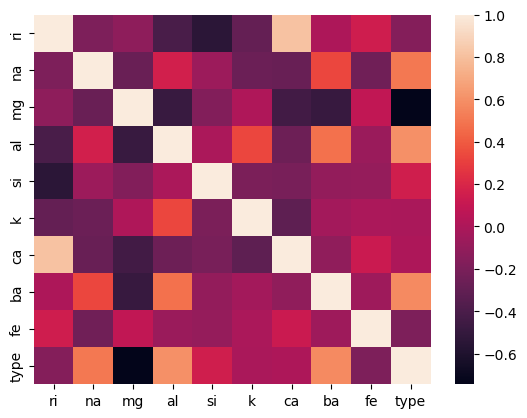

In [9]:
sns.heatmap(dataset.corr())

<Axes: >

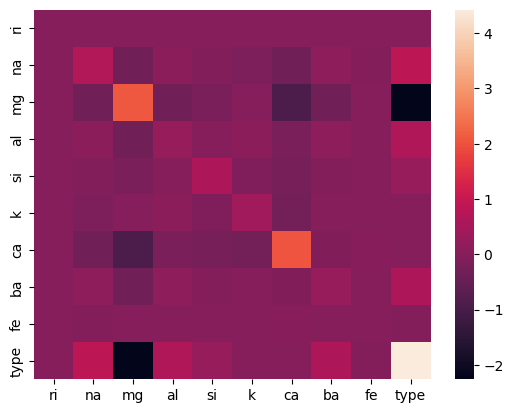

In [10]:
sns.heatmap(dataset.cov())

<Axes: >

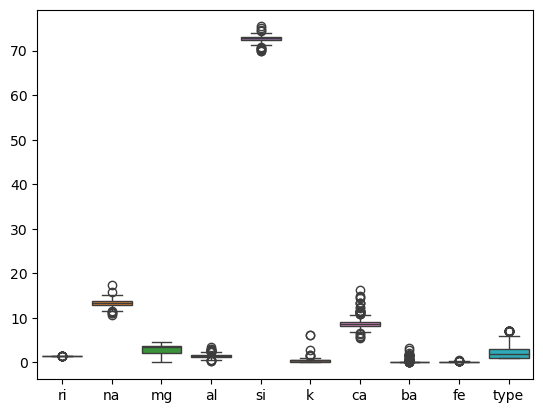

In [11]:
sns.boxplot(dataset)

<hr/>

## Deleting the variables 'k' and 'ca' because they have very low correlation with the predicting variable (type)

In [12]:
dataset.drop(columns=['k', 'ca'], inplace=True)

<hr/>

## Visualization for every class of the predicting variable 'type' to see the nature of the dataset

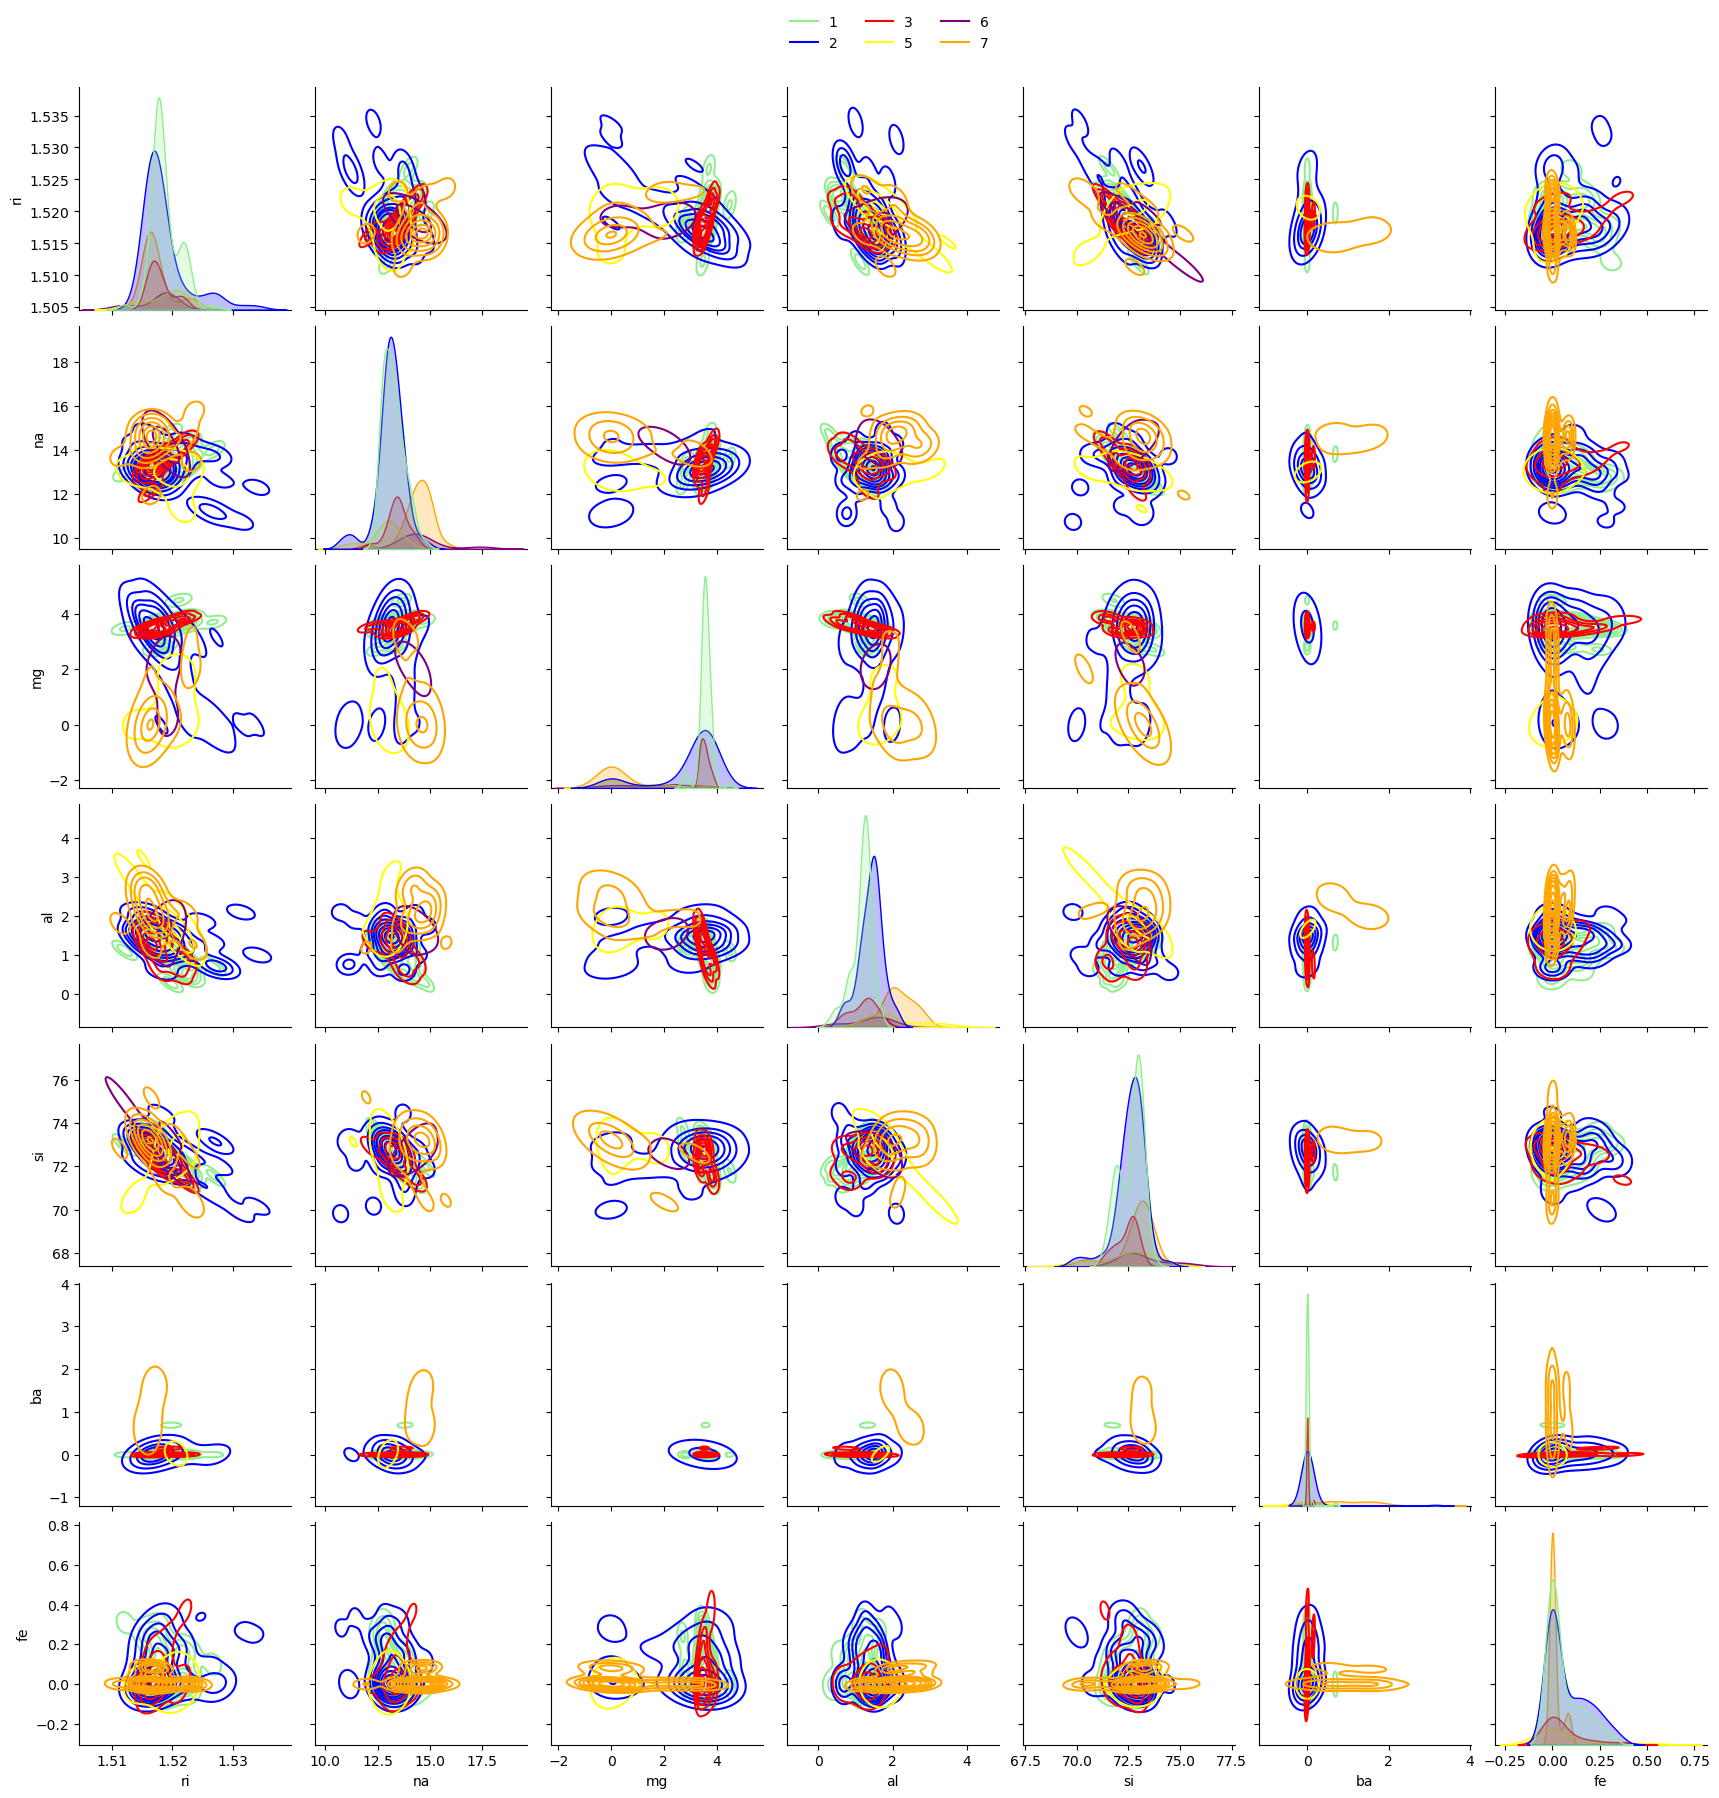

In [13]:
g=sns.pairplot(dataset, hue="type", kind='kde', palette=colors)
sns.move_legend(g, "lower center", bbox_to_anchor=(.5,1), title=None, ncol=3)
for t,l in zip(g._legend.texts, dataset['type'].unique()):
    t.set_text(l)

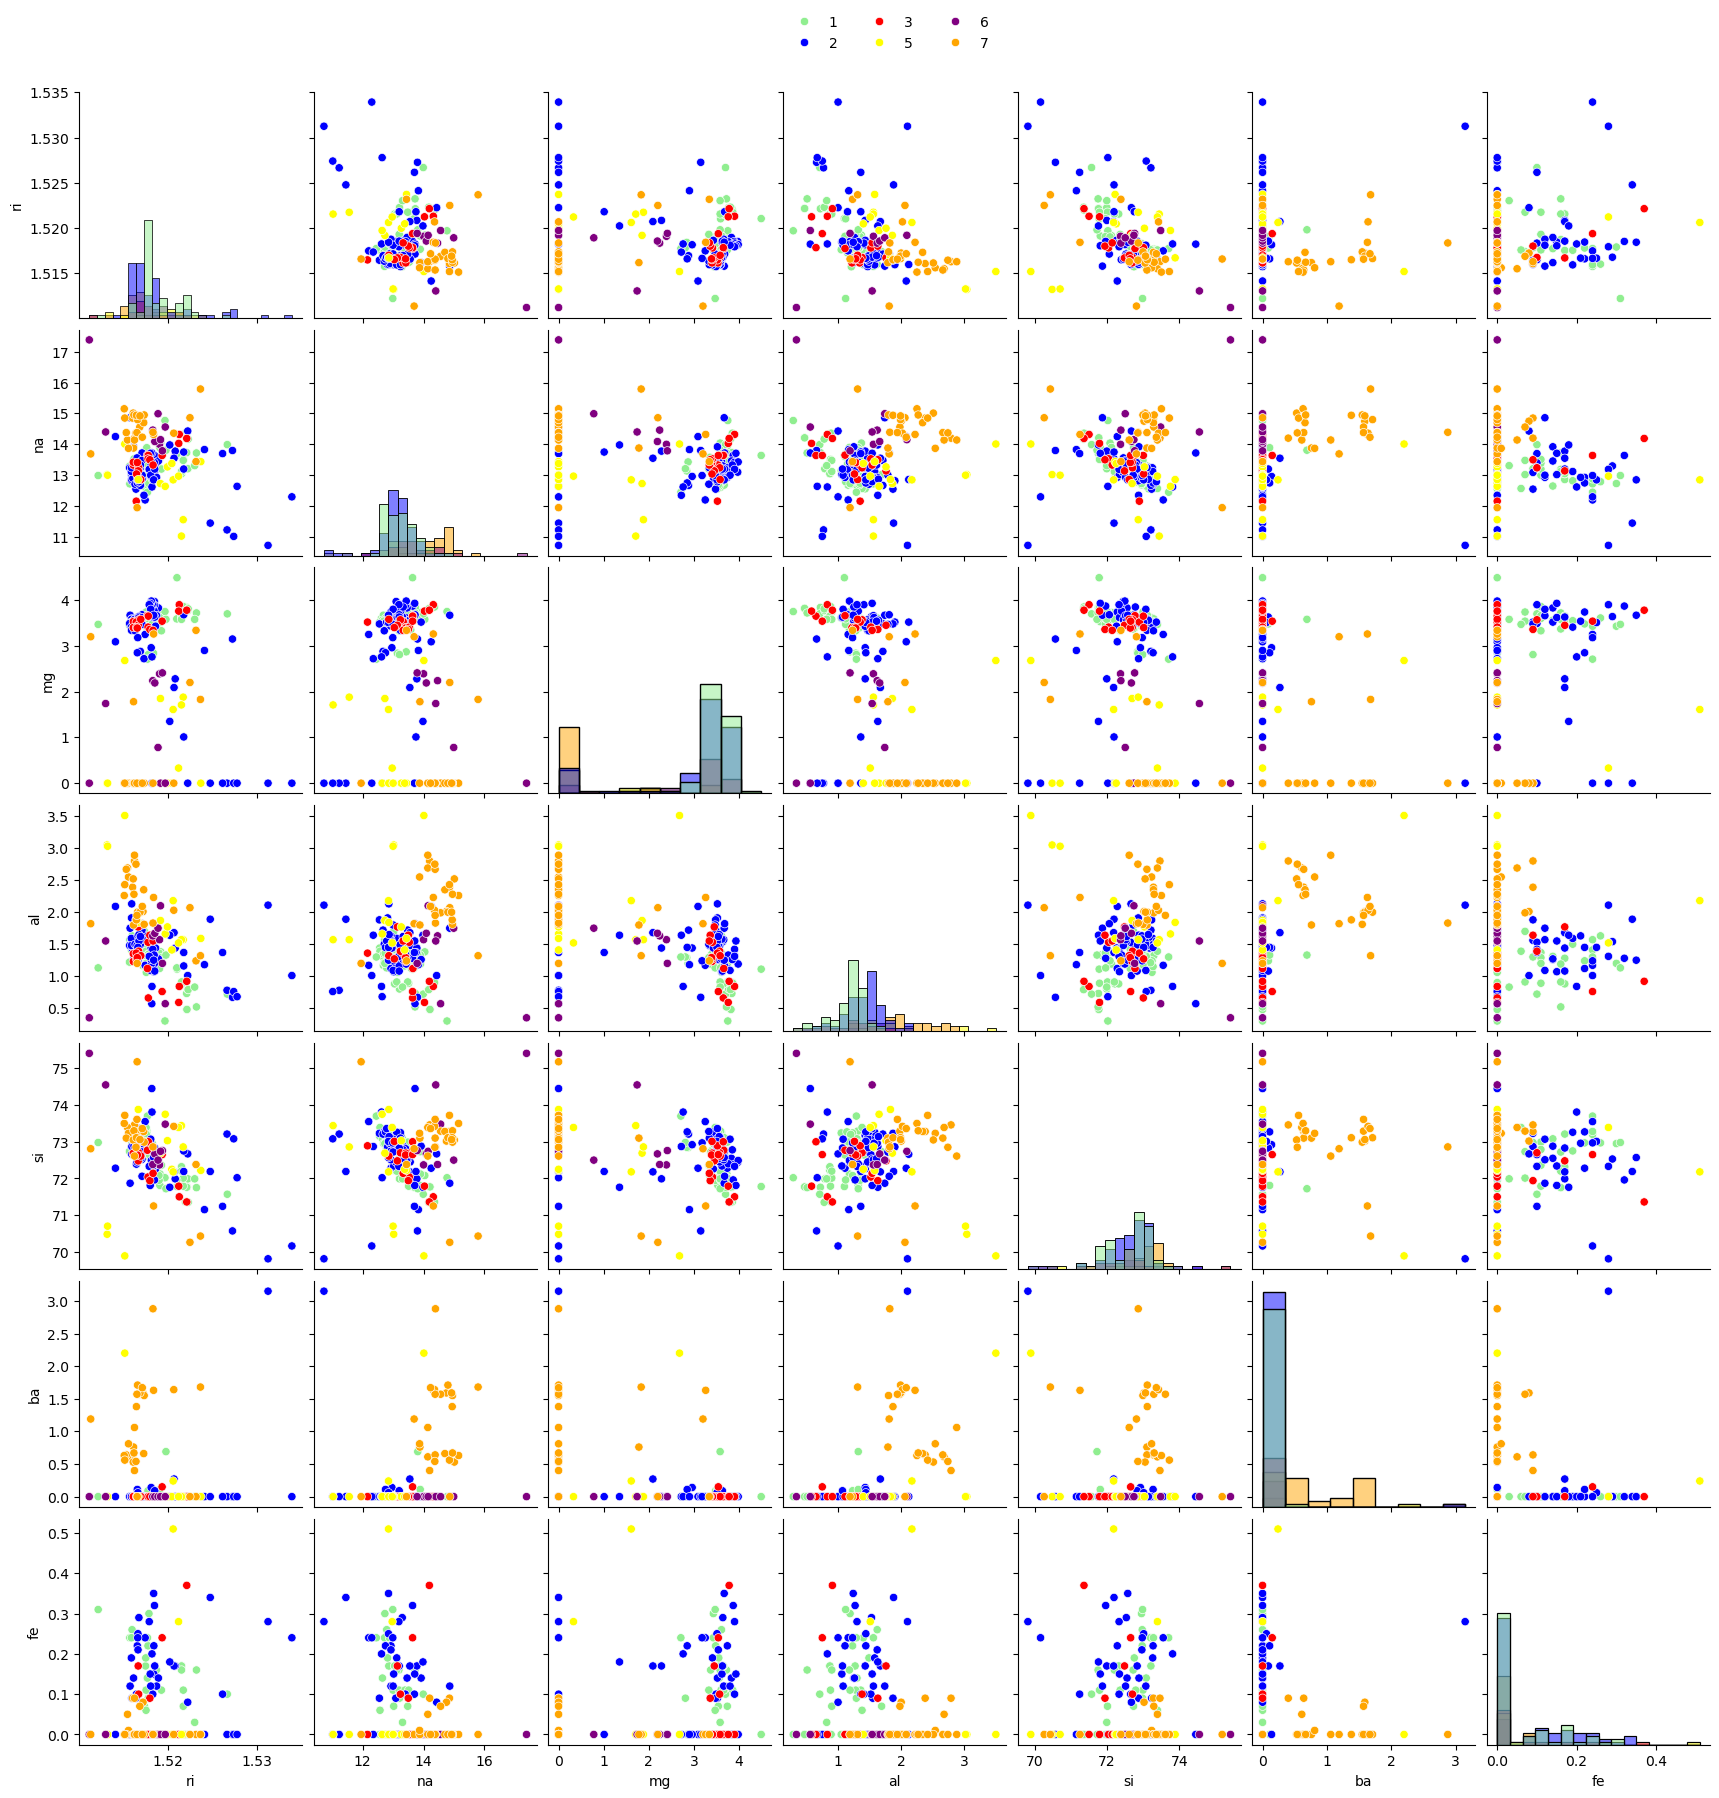

In [14]:
g=sns.pairplot(dataset, hue="type", diag_kind='hist', palette=colors)
sns.move_legend(g, "lower center", bbox_to_anchor=(.5,1), title=None, ncol=3)
for t,l in zip(g._legend.texts, dataset['type'].unique()):
    t.set_text(l)

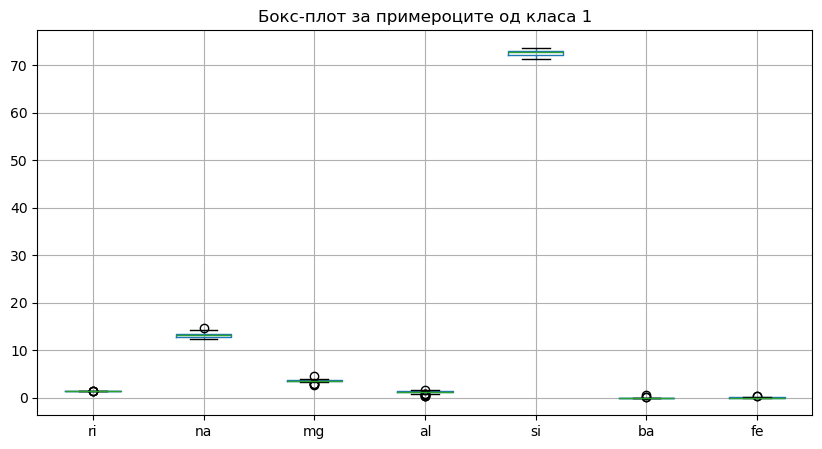

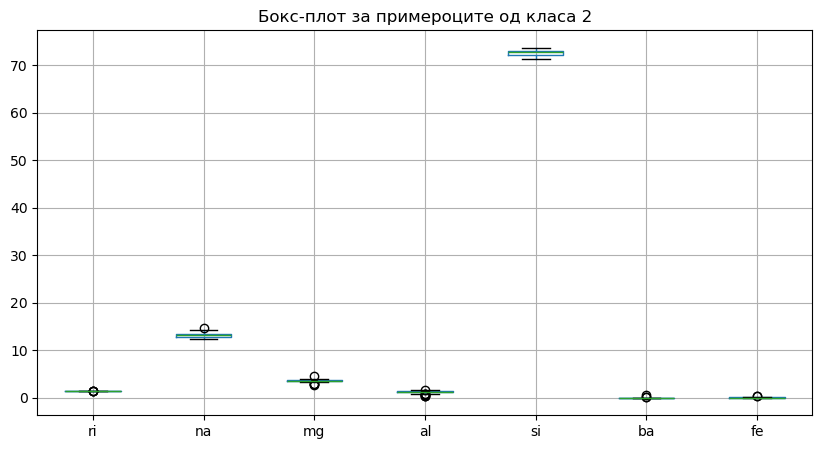

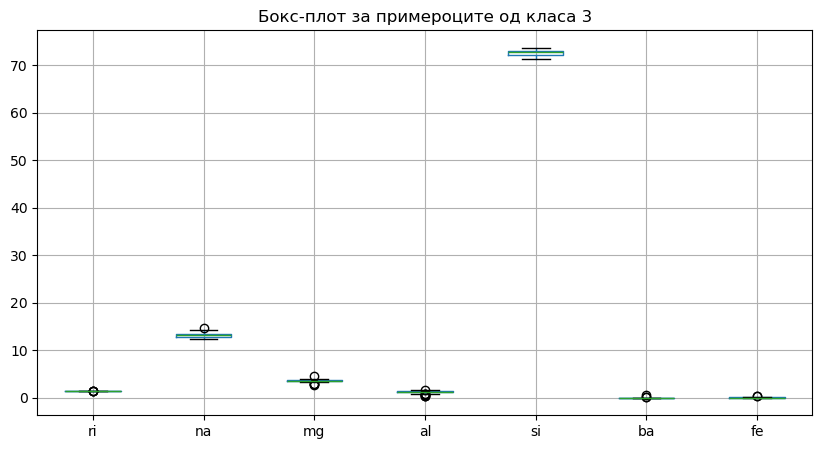

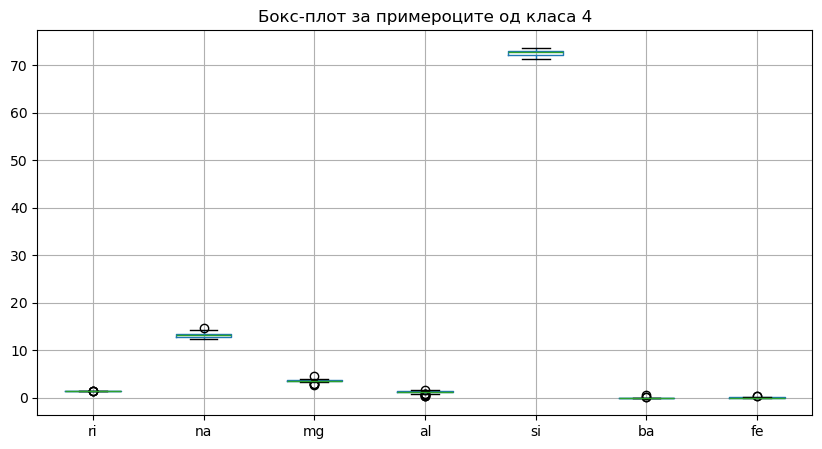

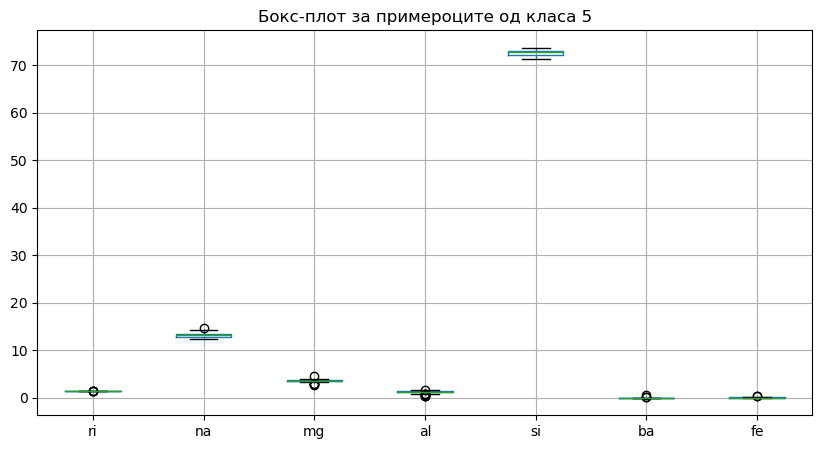

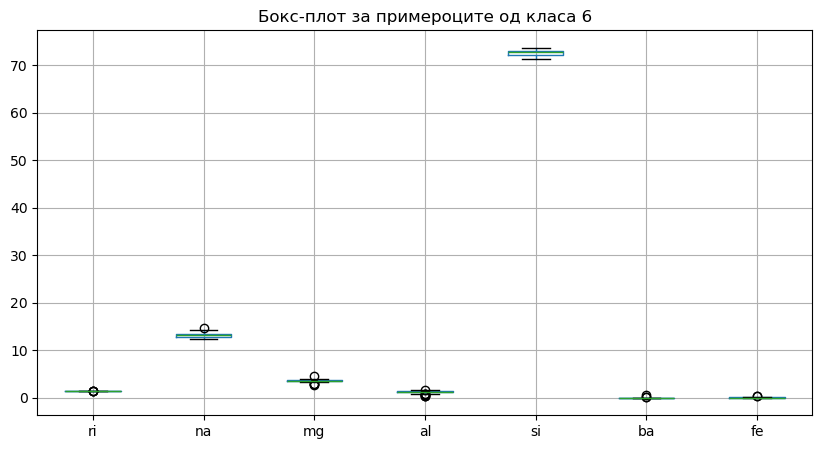

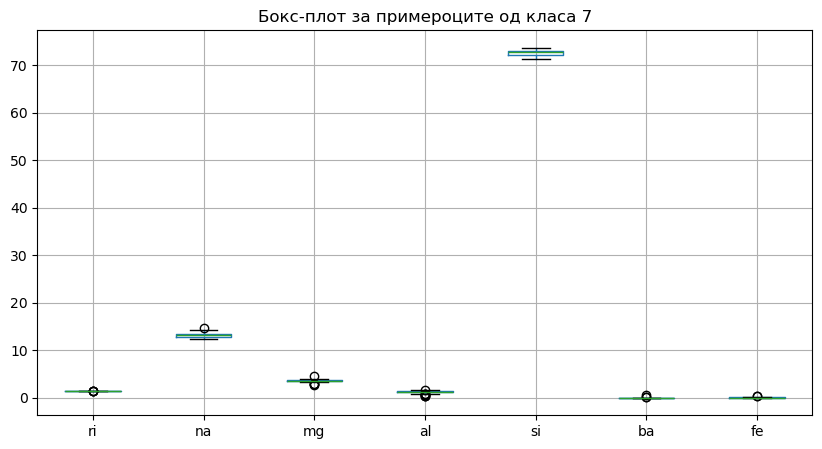

In [15]:
for i in range(1,8):
    fig = plt.figure(figsize=(10, 5))
    dataset[dataset['type']==1].drop(['type'], axis=1).boxplot()
    plt.title(f'Бокс-плот за примероците од класа {i}')
    plt.show()

<hr/>

## Covariance matrix for every class of the predicting variable

In [16]:
grouped = dataset.groupby('type')
for name, group in grouped:
    print(f"Covariance matrix for class {name}:\n")
    print(group.drop('type', axis=1).cov())
    print("\n")

Covariance matrix for class 1:

          ri        na        mg        al        si        ba        fe
ri  0.000005  0.000638  0.000224 -0.000450 -0.001043  0.000010 -0.000034
na  0.000638  0.249302  0.047858 -0.081568 -0.229524  0.006198 -0.014989
mg  0.000224  0.047858  0.061030 -0.026653 -0.070686  0.000145 -0.004310
al -0.000450 -0.081568 -0.026653  0.074615  0.097186  0.001897  0.002280
si -0.001043 -0.229524 -0.070686  0.097186  0.324312 -0.009824  0.009826
ba  0.000010  0.006198  0.000145  0.001897 -0.009824  0.007029 -0.000448
fe -0.000034 -0.014989 -0.004310  0.002280  0.009826 -0.000448  0.007934


Covariance matrix for class 2:

          ri        na        mg        al        si        ba        fe
ri  0.000014 -0.000985 -0.003558 -0.000482 -0.001818  0.000532  0.000082
na -0.000985  0.441108  0.279155  0.004957 -0.034269 -0.099371 -0.012204
mg -0.003558  0.279155  1.477833  0.107480  0.242092 -0.128514 -0.016525
al -0.000482  0.004957  0.107480  0.101341 -0.019565  0.02

<hr/>

## Splitting data

In [17]:
X,y = dataset.drop(columns='type'), dataset['type']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<hr/>

## Model selection

In [20]:
nb = GaussianNB()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

<hr/>

## Fitting the models

In [21]:
nb.fit(X_train, y_train)

GaussianNB()

In [22]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [23]:
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

<hr/>

## Predicting the data

In [24]:
y_pred_nb = nb.predict(X_test)

In [25]:
y_pred_lda = lda.predict(X_test)

In [26]:
y_pred_qda = qda.predict(X_test)

<hr/>

## Model Evaluation

In [27]:
evaluate_model("Naïve Bayes", y_test, y_pred_nb)


Naïve Bayes Model Performance:
Accuracy: 0.2923076923076923
Classification Report:
               precision    recall  f1-score   support

           1       0.50      0.19      0.28        21
           2       0.75      0.13      0.22        23
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         4
           6       0.07      1.00      0.14         3
           7       1.00      1.00      1.00         9

    accuracy                           0.29        65
   macro avg       0.39      0.39      0.27        65
weighted avg       0.57      0.29      0.31        65

Confusion Matrix:
 [[ 4  1  1  0 15  0]
 [ 3  3  2  0 15  0]
 [ 1  0  0  0  4  0]
 [ 0  0  0  0  4  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  9]]


In [28]:
evaluate_model("LDA", y_test, y_pred_lda)


LDA Model Performance:
Accuracy: 0.7076923076923077
Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.81      0.72        21
           2       0.70      0.70      0.70        23
           3       0.00      0.00      0.00         5
           5       0.80      1.00      0.89         4
           6       0.50      0.33      0.40         3
           7       1.00      0.89      0.94         9

    accuracy                           0.71        65
   macro avg       0.61      0.62      0.61        65
weighted avg       0.67      0.71      0.68        65

Confusion Matrix:
 [[17  4  0  0  0  0]
 [ 5 16  0  1  1  0]
 [ 4  1  0  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  2  0  0  1  0]
 [ 0  0  1  0  0  8]]


In [29]:
evaluate_model("QDA", y_test, y_pred_qda)


QDA Model Performance:
Accuracy: 0.046153846153846156
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         4
           6       0.05      1.00      0.09         3
           7       0.00      0.00      0.00         9

    accuracy                           0.05        65
   macro avg       0.01      0.17      0.01        65
weighted avg       0.00      0.05      0.00        65

Confusion Matrix:
 [[ 0  0  0  0 21  0]
 [ 0  0  0  0 23  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  4  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  9  0]]


<hr/>

## Conclusion
<p> 
1. Naïve Bayes Model Performance: Accuracy: 0.2923076923076923. Naïve Bayes classifier assumes that the features are conditionally independent given the class. The score tells us that in the dataset there exist some correlation between the features. </p>
<p>
2. <b>LDA</b> Model Performance: Accuracy: 0.7076923076923077. LDA assumes that the data is normally distributed and that different classes have same or similar covariances. The score tells us that the data is normally distributed and there is linear independence between the classes.
</p>
<p>
3. QDA Model Performance: Accuracy: 0.046153846153846156. QDA assumes that the data is normally distributed and that different classes have different covariances. The score tells us that the model is overfitting or struggling with the data or the model is too complex for the problem.
</p>

<b>LDA has the best performance of all the three models because the features are not independent, the covariance is very similar and the classes of the predicting variable are well separated (same or similar covariance across the classes)</b>